In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns

# Data Load

In [2]:
ticker = ['AAPL','MSFT','AMZN','GOOGL','TSLA']
stocks = yf.download(ticker[3], start = "2015-01-01")

[*********************100%***********************]  1 of 1 completed


In [3]:
stocks.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,26.629999,26.790001,26.393999,26.477501,26.477501,26480000
2015-01-05,26.357500,26.399500,25.887501,25.973000,25.973000,41182000
2015-01-06,26.025000,26.060499,25.277500,25.332001,25.332001,54456000
2015-01-07,25.547501,25.574499,25.182501,25.257500,25.257500,46918000
2015-01-08,25.075500,25.375000,24.750999,25.345501,25.345501,73054000


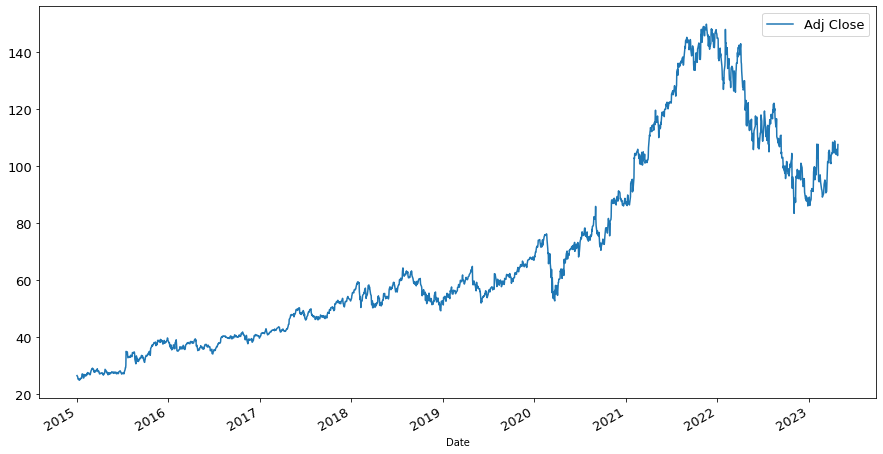

In [4]:
stocks['Adj Close'].plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

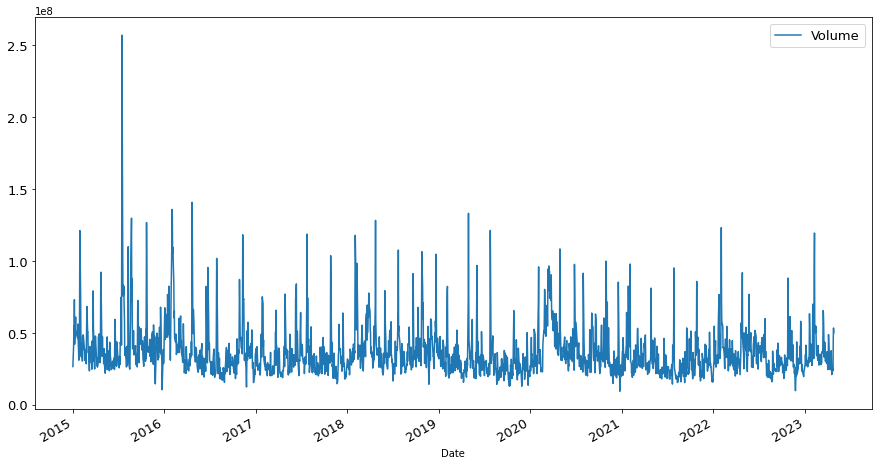

In [5]:
stocks['Volume'].plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

# Buy and Hold

In [6]:
df = stocks[['Adj Close','High','Low']]
df

,Adj Close,High,Low
Date,,,
2015-01-02,26.477501,26.790001,26.393999
2015-01-05,25.973000,26.399500,25.887501
2015-01-06,25.332001,26.060499,25.277500
2015-01-07,25.257500,25.574499,25.182501
2015-01-08,25.345501,25.375000,24.750999
...,...,...,...
2023-04-21,105.410004,106.000000,104.779999
2023-04-24,105.970001,106.629997,104.699997
2023-04-25,103.849998,106.690002,103.839996


In [9]:
df = stocks[['Adj Close','High','Low']]
df["returns"] = np.log(df['Adj Close'].div(df['Adj Close'].shift(1)))
df = df.rename(columns={'Adj Close':'price'})
df.dropna(inplace = True)
df.head(20)

C:\Users\ansem\AppData\Local\Temp\ipykernel_26008\2442205301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["returns"] = np.log(df['Adj Close'].div(df['Adj Close'].shift(1)))


,price,High,Low,returns
Date,,,,
2015-01-05,25.973000,26.399500,25.887501,-0.019238
2015-01-06,25.332001,26.060499,25.277500,-0.024989
2015-01-07,25.257500,25.574499,25.182501,-0.002945
2015-01-08,25.345501,25.375000,24.750999,0.003478
2015-01-09,25.035999,25.430000,24.932501,-0.012286
2015-01-12,24.853001,25.014000,24.545500,-0.007336
2015-01-13,25.090000,25.430000,24.863001,0.009491
2015-01-14,25.296499,25.413000,24.908001,0.008197
2015-01-15,25.200500,25.487499,25.100500,-0.003802


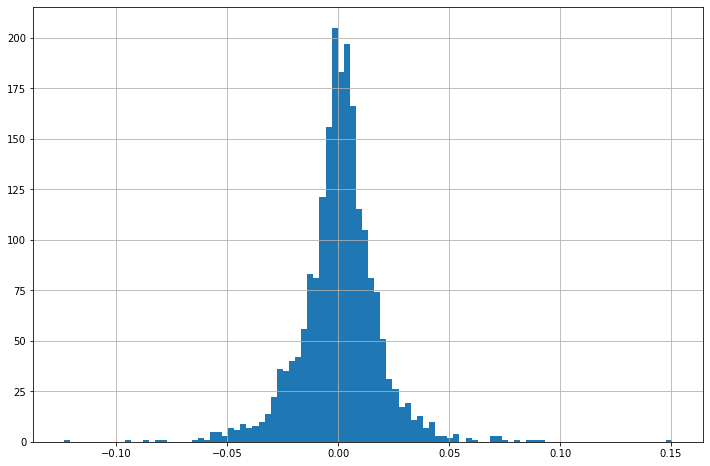

In [8]:
df.returns.hist(bins = 100, figsize = (12, 8))
plt.show()

In [10]:
df["creturns"] = df.returns.cumsum().apply(np.exp)
df.tail()

,price,High,Low,returns,creturns
Date,,,,,
2023-04-21,105.410004,106.000000,104.779999,0.001139,3.981116
2023-04-24,105.970001,106.629997,104.699997,0.005299,4.002266
2023-04-25,103.849998,106.690002,103.839996,-0.020209,3.922198
2023-04-26,103.709999,106.349998,102.629997,-0.001349,3.916910
2023-04-27,107.589996,108.370003,103.540001,0.036729,4.063450


In [11]:
df.returns.mean()*100 # 하루 수익 평균 0.0670%

0.06698673302699158

In [12]:
np.exp(df.returns.sum()) # 2015년에 사서 가만히 있었다면 406% 수익

4.063449820326366

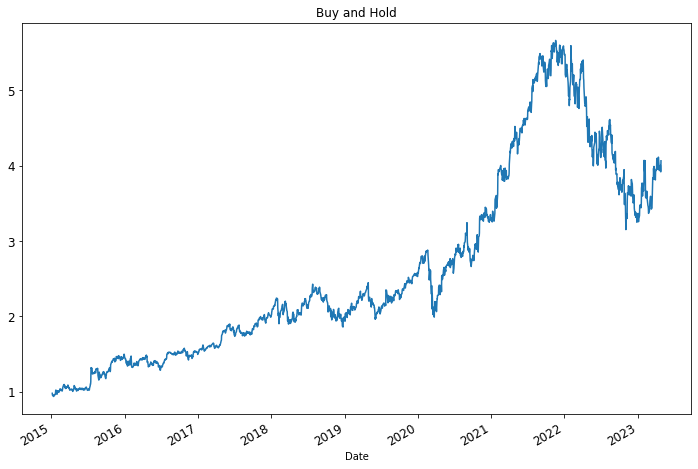

In [13]:
df.creturns.plot(figsize = (12, 8), title = "Buy and Hold", fontsize = 12)
plt.show()

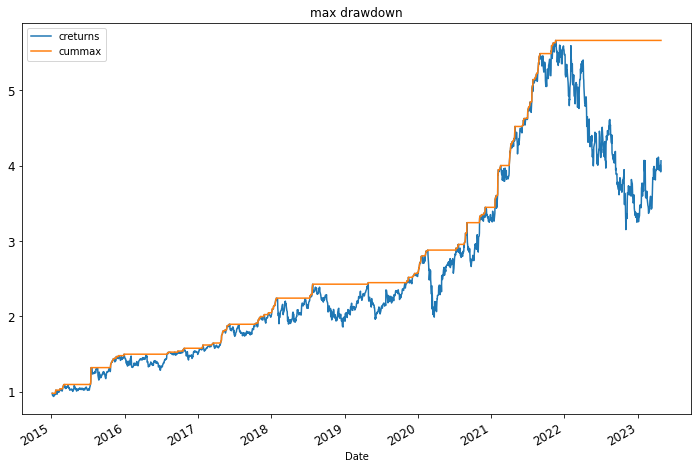

In [14]:
df["cummax"] = df.creturns.cummax()
df[["creturns", "cummax"]].dropna().plot(figsize = (12, 8), title = "max drawdown", fontsize = 12)
plt.show()

# MACD

## MACD processing

In [42]:
## parameter ##
sma_s = 12
sma_l = 26
signal = 9
################

df2 = df[['price']]
df2["SMA_S"] = df.price.rolling(sma_s).mean()
df2["SMA_L"] = df.price.rolling(sma_l).mean()
df2["MACD"] = df2['SMA_S'] - df2['SMA_L']
df2['signal'] = df2.MACD.rolling(signal).mean()

df2.dropna(inplace=True)

C:\Users\ansem\AppData\Local\Temp\ipykernel_26008\2346750386.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["SMA_S"] = df.price.rolling(sma_s).mean()
C:\Users\ansem\AppData\Local\Temp\ipykernel_26008\2346750386.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["SMA_L"] = df.price.rolling(sma_l).mean()
C:\Users\ansem\AppData\Local\Temp\ipykernel_26008\2346750386.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [43]:
df2.tail()

,price,SMA_S,SMA_L,MACD,signal
Date,,,,,
2023-04-21,105.410004,105.914167,104.309231,1.604936,2.694851
2023-04-24,105.970001,106.039167,104.526539,1.512628,2.468105
2023-04-25,103.849998,105.658334,104.612308,1.046026,2.237564
2023-04-26,103.709999,105.430834,104.708077,0.722756,1.983077
2023-04-27,107.589996,105.617500,104.810770,0.806731,1.727806


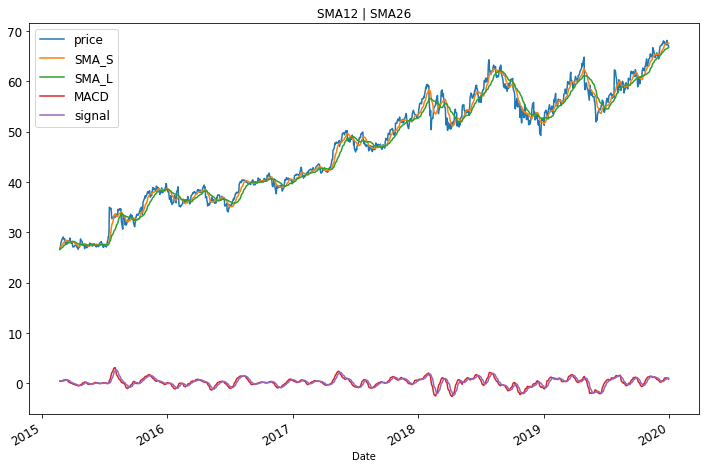

In [44]:
df2.loc[:"2020-01-01"].plot(figsize = (12, 8), title = "SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

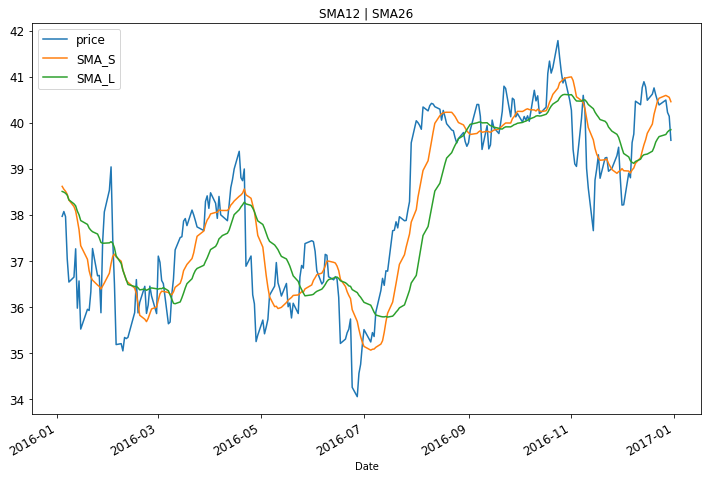

In [45]:
df2.loc["2016"][['price','SMA_S','SMA_L']].plot(figsize = (12, 8), title = "SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

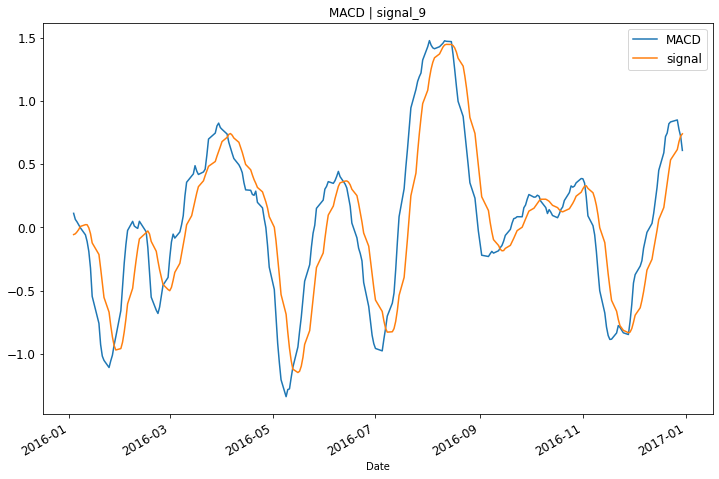

In [47]:
df2.loc["2016"][['MACD','signal']].plot(figsize = (12, 8), title = "MACD | signal_{}".format(signal), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

## MACD logic

In [48]:
# macd가 양수이면 sma_s > sma_l 이므로 상승장이다.
# macd가 (-) -> (+) 시점 매수 (소량 매수)
# macd-signal (-) -> (+) 인 경우 매수 (매수)
# 기울기가 크다면 (강력매수)

# macd가 음수이면 sma_s < sma_l 이므로 하락장이다.
# macd가 (+) -> (-) 시점 매도 (소량 매도)
# macd-signal (+) -> (-) 인 경우 매도 (매도)
# 기울기가 음으로 크다면 (강력매도)

# 골든 크로스를 돌파할 때의 기울기를 바탕으로 portion 조절
# macd' - signal' 의 기울기가 양으로 크면 강력한 매수 신호
# 반대로 기울기가 양으로 작으면 강력한 매도 신호

# 기본적으로 short position은 잡지 않는다. 주식은 공매를 칠 수 없기 때문임

In [68]:
# macd' - signal' 의 기울기가 양으로 크면 강력한 매수 신호
# 반대로 기울기가 양으로 작으면 강력한 매도 신호
grad_macd = np.gradient(df2['MACD'].values)
grad_singal = np.gradient(df2['signal'].values)
grad = grad_macd-grad_singal
df2['grad'] = grad

df2.head()

C:\Users\ansem\AppData\Local\Temp\ipykernel_26008\3929024811.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['grad'] = grad


,price,SMA_S,SMA_L,MACD,signal,grad,position,positionum
Date,,,,,,,,
2015-02-23,26.750000,26.996792,26.569231,0.427561,0.479928,-0.023670,소량매수,2
2015-02-24,26.932501,27.033542,26.635846,0.397695,0.473733,-0.017027,소량매수,2
2015-02-25,27.366501,27.089584,26.706750,0.382833,0.469255,0.011980,소량매수,2
2015-02-26,27.964500,27.214625,26.801654,0.412971,0.465048,0.028834,소량매수,2
2015-02-27,28.131500,27.308250,26.882885,0.425365,0.454119,0.056729,소량매수,2


-0.08508580600434223 0.02908511338410534


<AxesSubplot:>

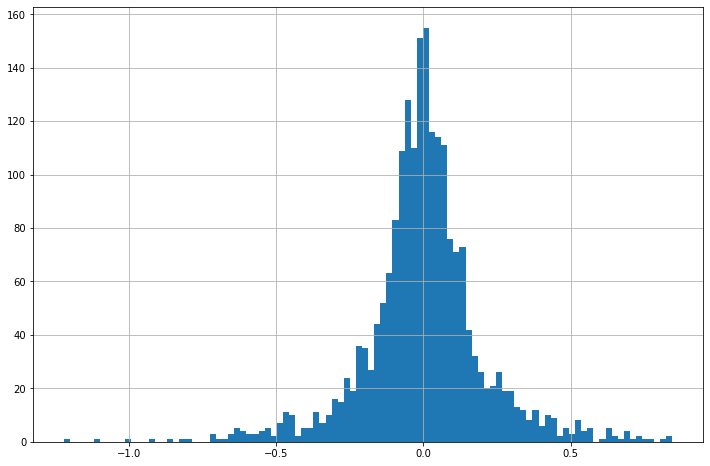

In [69]:
## parameter ##
up = 25
down = 60
###############

qdown, qup = np.percentile(grad,[up,down])
# 매도 타이밍에서 값이 q25 이하면 강력한 매도 신호
# 매수 타이밍에서 값이 q75 이상히면 강력한 매수 신호
print(qdown, qup)

df2.grad.hist(bins=100, figsize=(12,8))

In [70]:
position = []
positionum = []

for i in range(len(df2)):
    if df2.MACD[i]>0:
        if df2.MACD[i]>df2.signal[i]:
            if df2.grad[i] > qup:
                position.append('강력매수')
                positionum.append(3)
            else:
                position.append('매수')
                positionum.append(2)
        else:
            position.append('소량매수')
            positionum.append(2)
    elif df2.MACD[i]<0:
        if df2.MACD[i]<df2.signal[i]:
            if df2.grad[i] < qdown:
                position.append('강력매도')
                positionum.append(-3)
            else:
                position.append('매도')
                positionum.append(-2)
        else:
            position.append('소량매도')
            positionum.append(-1)
    else:
        position.append('홀드')
        positionum.append(0)

df2['position'] = position
df2['positionum'] = positionum

C:\Users\ansem\AppData\Local\Temp\ipykernel_26008\3209877064.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['position'] = position
C:\Users\ansem\AppData\Local\Temp\ipykernel_26008\3209877064.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['positionum'] = positionum


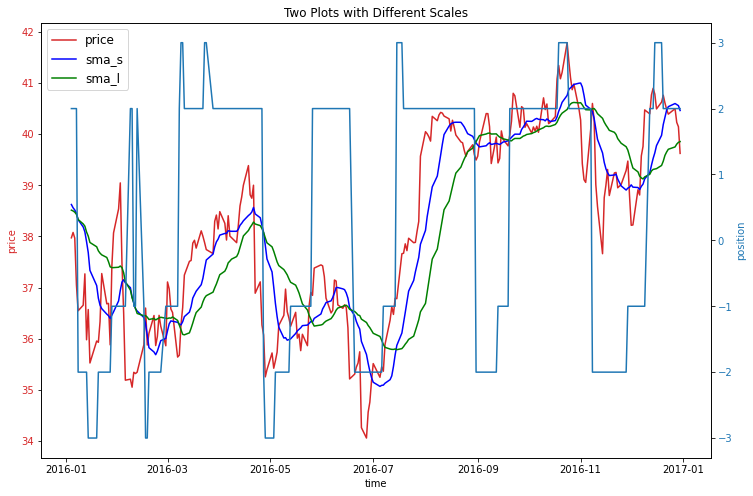

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# create some data for the plots

# create the figure and axes
fig, ax1 = plt.subplots(figsize = (12, 8))
x = df2.loc['2016'].index
y1 = df2[['price','SMA_S','SMA_L']].loc['2016']
y2 = df2.positionum.loc['2016']


# create the first plot
color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('price', color=color)
ax1.plot(x, y1['price'], color=color, label='price')
ax1.plot(x, y1['SMA_S'], color='blue', label='sma_s')
ax1.plot(x, y1['SMA_L'], color='green', label='sma_l')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left', fontsize=12)

# create the second plot
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('position', color=color)
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# set the title
plt.title("Two Plots with Different Scales")

# display the plot
plt.show()


# RSI + 볼린저밴드

In [72]:
# high가 볼린저 밴드 상단을 돌파해서 나갈때 + 과매수 구간(RSI) => 적극 매도
# high가 볼린저 밴드 상단을 돌파 + 과매수 구간 X => 매도
# low가 볼린저 밴드 하단을 돌파해서 들어올때 + 과매도 구간(RSI) => 적극 매수
# low가 볼랜저 밴드 하단을 돌파 + 과매도 구간 X => 매수

# distance4high = Upper - High , (+) > (-) 될때 매도
# distance4low = Lower - Low   , (+) > (-) 될때 매수

In [93]:
df3 = df[['price','High','Low']]
df3.head()

,price,High,Low
Date,,,
2015-01-05,25.973000,26.399500,25.887501
2015-01-06,25.332001,26.060499,25.277500
2015-01-07,25.257500,25.574499,25.182501
2015-01-08,25.345501,25.375000,24.750999
2015-01-09,25.035999,25.430000,24.932501


In [100]:
## parameter ##
SMA = 30
dev = 2
###############

df3["SMA"] = df3.price.rolling(SMA).mean()
df3["Lower"] = df3["SMA"] - df3["price"].rolling(SMA).std() * dev # Lower Band
df3["Upper"] = df3["SMA"] + df3["price"].rolling(SMA).std() * dev # Upper Band
df3.dropna(inplace=True)

C:\Users\ansem\AppData\Local\Temp\ipykernel_26008\1957969811.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df3[['Upper','High']]['2016'].plot(figsize = (12, 8))


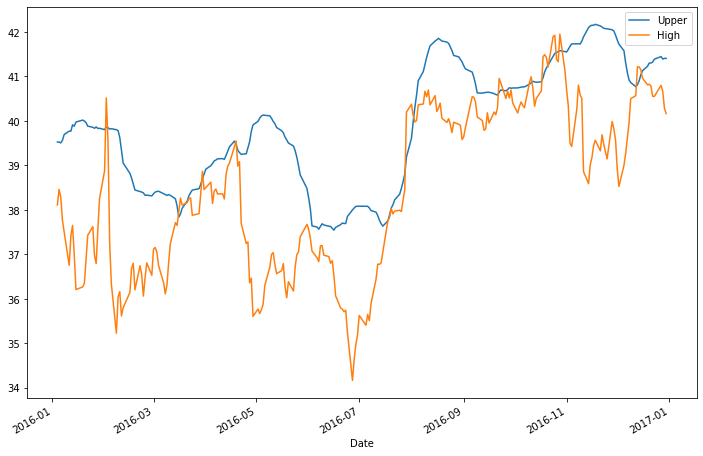

In [101]:
df3[['Upper','High']]['2016'].plot(figsize = (12, 8))
plt.show()

C:\Users\ansem\AppData\Local\Temp\ipykernel_26008\3547206308.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df3[['Lower','Low']]['2016'].plot(figsize = (12, 8))


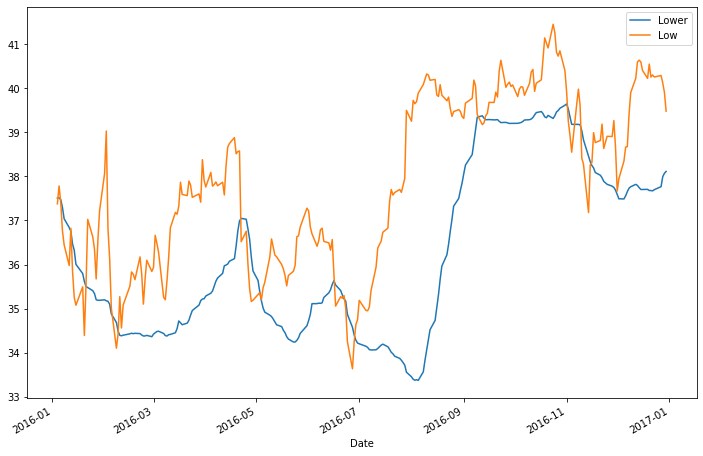

In [102]:
df3[['Lower','Low']]['2016'].plot(figsize = (12, 8))
plt.show()

In [103]:
position = []
positionum = []

df3["positionum"] = np.where(df3.Low < df3.Lower, 1, np.nan) # 1. oversold -> go long
df3["positionum"] = np.where(df3.Low > df3.Upper, -1, df3["positionum"]) # 2. overbought -> go short



df3["distance"] = df3.SMA - df3.price # helper Column
df3["positionum"] = np.where(df3.distance * df3.distance.shift(1) < 0, 0, df3["positionum"])
df3["positionum"] = df3.positionum.ffill().fillna(0)

df3.positionum.value_counts()

 0.0    1163
-1.0     474
 1.0     427
Name: positionum, dtype: int64

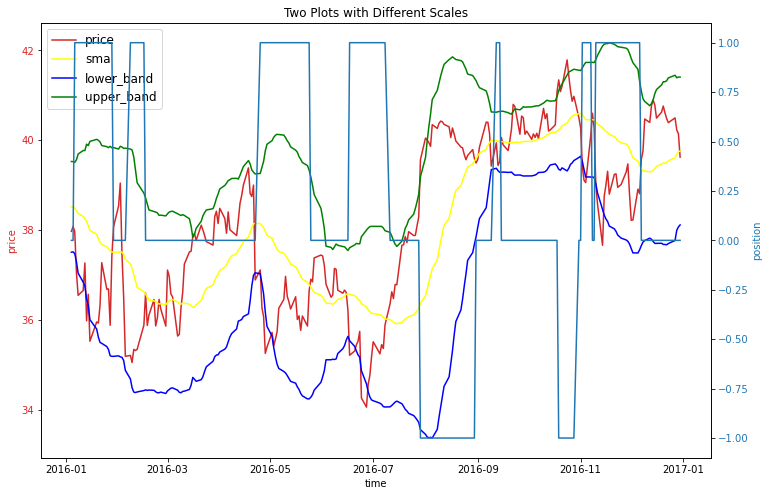

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# create some data for the plots

# create the figure and axes
fig, ax1 = plt.subplots(figsize = (12, 8))
x = df3.loc['2016'].index
y1 = df3[['price','SMA','Lower','Upper']].loc['2016']
y2 = df3.positionum.loc['2016']


# create the first plot
color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('price', color=color)
ax1.plot(x, y1['price'], color=color, label='price')
ax1.plot(x, y1['SMA'], color='yellow', label='sma')
ax1.plot(x, y1['Lower'], color='blue', label='lower_band')
ax1.plot(x, y1['Upper'], color='green', label='upper_band')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left', fontsize=12)

# create the second plot
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('position', color=color)
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# set the title
plt.title("Two Plots with Different Scales")

# display the plot
plt.show()


## RSI

In [105]:
df3["returns"] = np.log(df3['price'].div(df3['price'].shift(1)))
df3.head()

,price,High,Low,SMA,Lower,Upper,positionum,distance,returns
Date,,,,,,,,,
2015-02-17,27.2505,27.650000,27.163000,26.156284,24.562360,27.750207,0.0,-1.094216,NaN
2015-02-18,27.1325,27.377501,26.977501,26.194934,24.563608,27.826259,0.0,-0.937566,-0.004340
2015-02-19,27.3225,27.343000,27.037500,26.261284,24.613357,27.909210,0.0,-1.061217,0.006978
2015-02-20,27.0900,27.379000,26.905001,26.322367,24.692651,27.952083,0.0,-0.767633,-0.008546
2015-02-23,26.7500,26.965000,26.600000,26.369184,24.775287,27.963080,0.0,-0.380816,-0.012630


In [116]:
rolling_date = 14
rsi = []

for i in range(len(df3)):
    up = [return_value if return_value > 0 else 0 for return_value in df3[i-rolling_date:].returns]
    down = [return_value if return_value < 0 else 0 for return_value in df3[i-rolling_date:].returns]

    au = sum(up)/len(up)
    ad = sum(down)/len(down)

    rsi.append(au / (au + ad))

In [120]:
df3['rsi'] = rsi
df3 = df3.iloc[25:]
df3.head()

,price,High,Low,SMA,Lower,Upper,positionum,distance,returns,rsi
Date,,,,,,,,,,
2015-03-24,28.877001,29.094000,28.404499,27.902267,26.518232,29.286302,0.0,-0.974734,0.021297,10.204104
2015-03-25,28.350000,29.003500,28.350000,27.947000,26.596216,29.297784,0.0,-0.403000,-0.018418,10.197929
2015-03-26,28.181999,28.359501,27.915501,27.989734,26.696104,29.283363,0.0,-0.192266,-0.005944,10.235506
2015-03-27,27.877501,28.203501,27.846500,28.008967,26.740834,29.277099,0.0,0.131466,-0.010864,10.121194
2015-03-30,28.056999,28.108000,27.839500,28.025600,26.768905,29.282295,0.0,-0.031399,0.006418,10.135639


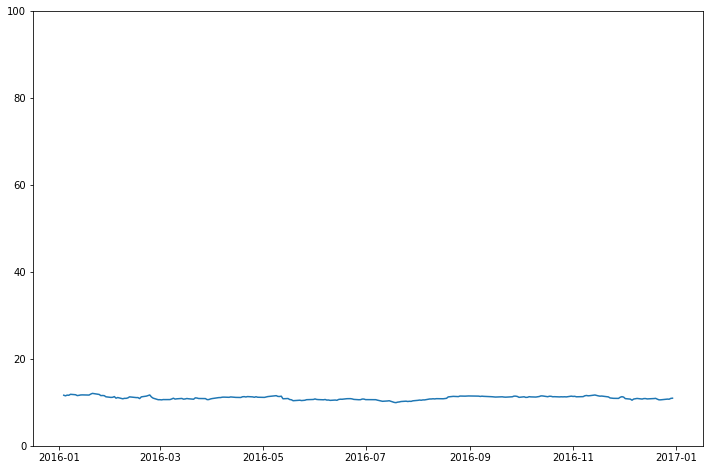

In [138]:
plt.figure(figsize=(12,8))
plt.plot(df3.loc['2016'].index, df3.loc['2016']['rsi'])
plt.ylim(0,100)

plt.show()

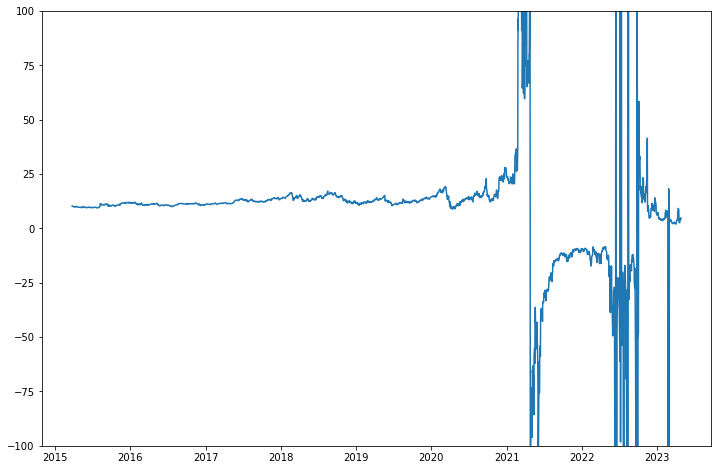

In [141]:
plt.figure(figsize=(12,8))
plt.plot(df3.index, df3['rsi'])
plt.ylim(-100,100)

plt.show()